###
## SVM Model
###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cancer = datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

# Map target to categorical labels
df['target'] = df['target'].map({0: 'Benign', 1: 'Malignant'})

###
## Train Test Split:
###

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)


###
## Shapes:
###

In [5]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 30), (569,), (455, 30), (114, 30), (455,), (114,))

###
## Importing SVM:
###

In [6]:
from sklearn import svm

###
## Training Algorithm:
###

In [7]:
clf = svm.LinearSVC(dual = 'auto')
clf.fit(X_train, y_train)


LinearSVC(dual='auto')

###
## Predicting Useen Part of Dataset:
###

In [8]:
y_predict = clf.predict(X_test)
y_predict

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1])

###
## Classification Report:
###

In [9]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



###
## Model Accuracy Rate:
###

In [13]:
print(f'Model Accuracy Rate: {clf.score(X_test, y_test) * 100:.3f} %')

Model Accuracy Rate: 95.614 %


###
## Confusion Matrix:
###

In [11]:
print(metrics.confusion_matrix(y_test, y_predict))

[[39  3]
 [ 2 70]]


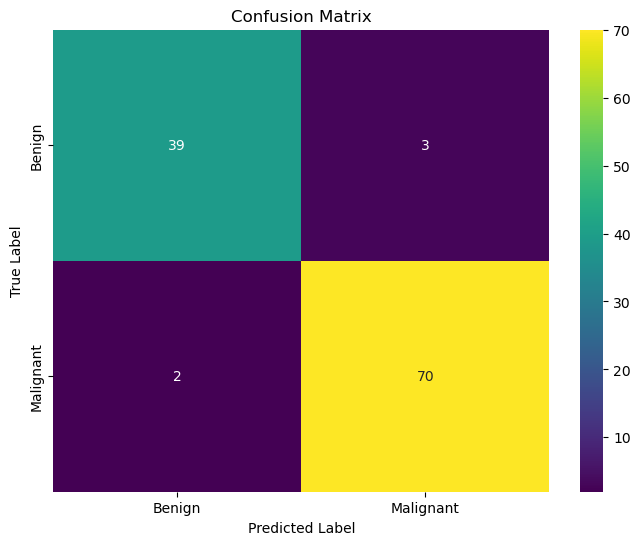

In [29]:
cm = metrics.confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()